<h1> Créer un portefeuille optimisé en utilisant la frontière effience </h1>

<h4> Importer les bibliothèques et créer un environnement propice pour les calculs </h4>

In [1]:
#import des librairies python

import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#les symboles( Tickers ) dont on aura besoin
asset = ["META","AMZN","AAPL","NFLX","GOOG"]

#les poids de chaque titre dans le portefeuille
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

#date de début et date de fin(aujourd'hui)
stockStartDate = '1999-01-01'
today = dt.date.today().strftime('%Y-%m-%d')


In [3]:
#Créer la dataframe
df = pd.DataFrame()

for stock in asset:
    ticker = yf.Ticker(stock)
    df[stock] = ticker.history(start = stockStartDate, end = today)['Close']

In [4]:
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18 00:00:00-04:00,38.151604,10.692500,16.014690,9.994286,14.936952
2012-05-21 00:00:00-04:00,33.960213,10.905500,16.947701,10.248571,15.278033
2012-05-22 00:00:00-04:00,30.936428,10.766500,16.817560,9.672857,14.946903
2012-05-23 00:00:00-04:00,31.934378,10.864000,17.227917,10.272857,15.162349
2012-05-24 00:00:00-04:00,32.962265,10.762000,17.069693,10.038571,15.018055
...,...,...,...,...,...
2024-07-25 00:00:00-04:00,453.410004,179.850006,217.490005,634.090027,169.160004
2024-07-26 00:00:00-04:00,465.700012,182.500000,217.960007,631.369995,168.679993
2024-07-29 00:00:00-04:00,465.709991,183.199997,218.240005,626.960022,171.130005


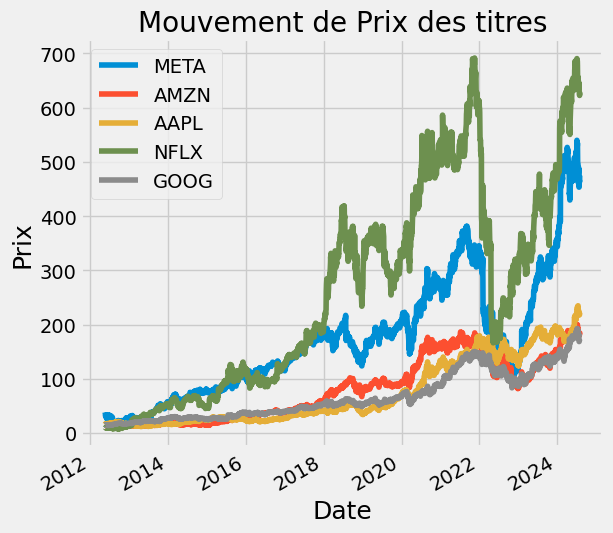

In [5]:
# graphique du mouvement des prix
df.plot(figsize=(6,6))
plt.title("Mouvement de Prix des titres")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Prix", fontsize = 18)
plt.legend(loc = "upper left")
plt.show()

<h4> Calcul des intrants </h4>

In [6]:
#Calcul des rendements 
new = df.pct_change()
new.dropna(inplace = True) # cela permet de supprimer les valeurs qui ne peuvent être calculer (NaN)
new

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-21 00:00:00-04:00,-0.109861,0.019921,0.058260,0.025443,0.022835
2012-05-22 00:00:00-04:00,-0.089039,-0.012746,-0.007679,-0.056175,-0.021674
2012-05-23 00:00:00-04:00,0.032258,0.009056,0.024400,0.062029,0.014414
2012-05-24 00:00:00-04:00,0.032187,-0.009389,-0.009184,-0.022806,-0.009517
2012-05-25 00:00:00-04:00,-0.033909,-0.010918,-0.005360,-0.000711,-0.020094
...,...,...,...,...,...
2024-07-25 00:00:00-04:00,-0.017040,-0.005419,-0.004805,-0.002987,-0.029879
2024-07-26 00:00:00-04:00,0.027106,0.014734,0.002161,-0.004290,-0.002838
2024-07-29 00:00:00-04:00,0.000021,0.003836,0.001285,-0.006985,0.014525


In [7]:
#Calculer les rendements moyen et la matrice de covariance 

Er = new.mean()
cov_matrice = new.cov()

In [8]:
Er

META    0.001143
AMZN    0.001136
AAPL    0.001016
NFLX    0.001797
GOOG    0.000945
dtype: float64

In [9]:
#Générer les portefeuilles aléatoires 
iteration = 10000

ret = np.zeros(iteration)
vol = np.zeros(iteration)
shape_R = np.zeros(iteration)
wt = np.zeros((iteration, len(new.columns)))


In [10]:
wt

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [11]:
for i in range(iteration):
    w = np.random.random(len(new.columns))
    w = w/np.sum(w)
    
    wt[i, :] = w
    ret[i] = np.sum(new.mean()*252*w)
    vol[i] = np.sqrt(np.dot(w.T,np.dot(new.cov()*252,w)))
    shape_R[i] = ret[i]/vol[i]
    
    

In [12]:
vol

array([0.26497704, 0.2874486 , 0.26485499, ..., 0.26386124, 0.27086819,
       0.27025654])

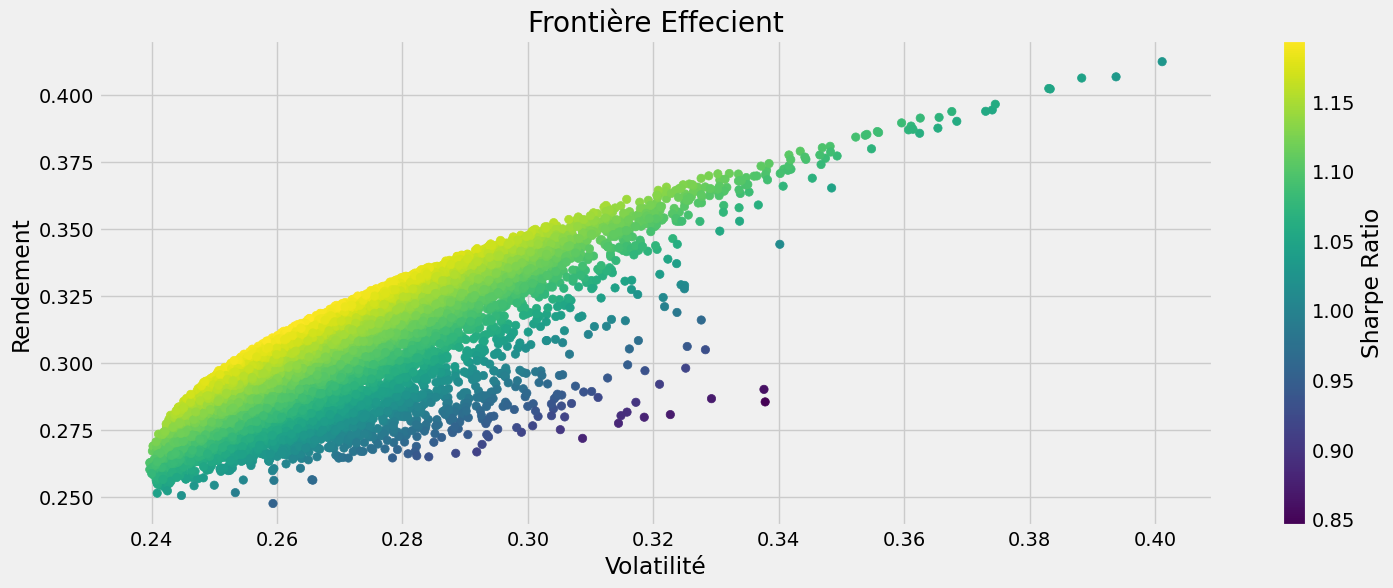

In [13]:
plt.figure(figsize=(16,6))
plt.scatter(vol, ret, c = shape_R, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Frontière Effecient')
plt.show()